In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import ollama  # Use Ollama instead of OpenAI




In [15]:
job_embedding_dim = 12
reason_embedding_dim = 24

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import ollama

# Load dataset
df = pd.read_csv("survey.csv")
df = df.dropna()

# Define embedding model
embedding_model = "mxbai-embed-large"

# Set dimensions (not required for Ollama, but keeping for reference)
job_embedding_dim = 12
reason_embedding_dim = 24

# Function to get embeddings from Ollama
def get_embedding(text):
    return ollama.embeddings(model=embedding_model, prompt=text)["embedding"]

# Generate embeddings for job titles and join reasons
job_embeddings = df['job_title'].apply(get_embedding)
reason_embeddings = df['join_reason'].apply(get_embedding)

# Combine both embeddings into a single list
embedding_list = [job_embeddings.iloc[i] + reason_embeddings.iloc[i] for i in range(len(df))]

# Create column names
col_names = [f"job_embedding-{i+1}" for i in range(len(job_embeddings.iloc[0]))] + \
            [f"reason_embedding-{i+1}" for i in range(len(reason_embeddings.iloc[0]))]

# Convert to DataFrame
df_embeddings = pd.DataFrame(embedding_list, columns=col_names)

print(df_embeddings.head())  # Check the generated embeddings


   job_embedding-1  job_embedding-2  job_embedding-3  job_embedding-4  \
0        -0.058381         0.096646        -0.030374        -0.953789   
1        -0.478202        -0.022784        -0.210228         0.201899   
2         0.192620         0.052378        -0.150110        -1.439925   
3         0.104954        -0.430748        -0.226451        -1.134365   
4         0.060572        -0.195136        -0.269696        -0.852501   

   job_embedding-5  job_embedding-6  job_embedding-7  job_embedding-8  \
0        -0.013214        -0.106048        -0.267999         0.467297   
1        -0.413750         0.060716        -0.161412        -0.059846   
2         0.102699        -0.003754         0.221189         0.337190   
3         0.097716         0.750295        -0.160350         0.093049   
4         0.233068        -0.183172         0.123652         0.413675   

   job_embedding-9  job_embedding-10  ...  reason_embedding-1015  \
0         0.384371         -0.447047  ...             

In [ ]:
df_embeddings

,job_embedding-1,job_embedding-2,job_embedding-3,job_embedding-4,job_embedding-5,job_embedding-6,job_embedding-7,job_embedding-8,job_embedding-9,job_embedding-10,...,reason_embedding-1015,reason_embedding-1016,reason_embedding-1017,reason_embedding-1018,reason_embedding-1019,reason_embedding-1020,reason_embedding-1021,reason_embedding-1022,reason_embedding-1023,reason_embedding-1024
0,-0.058381,0.096646,-0.030374,-0.953789,-0.013214,-0.106048,-0.267999,0.467297,0.384371,-0.447047,...,0.232699,-0.377504,0.286285,-0.301113,0.080053,-0.081444,-0.187852,0.586745,-0.083608,0.983276
1,-0.478202,-0.022784,-0.210228,0.201899,-0.413750,0.060716,-0.161412,-0.059846,0.231590,-0.322868,...,0.210297,-0.517828,0.452343,-0.398821,0.041350,-0.352447,-0.012078,0.458955,-0.472137,0.562580
2,0.192620,0.052378,-0.150110,-1.439925,0.102699,-0.003754,0.221189,0.337190,0.456330,-0.186204,...,0.179085,-0.276567,0.269512,-0.584186,0.284692,0.249970,0.452986,0.352470,0.273385,0.374212
3,0.104954,-0.430748,-0.226451,-1.134365,0.097716,0.750295,-0.160350,0.093049,0.173104,0.117667,...,0.137683,-0.492072,0.520405,-1.034956,0.019666,-0.049167,0.286583,0.114129,0.393055,0.227170
4,0.060572,-0.195136,-0.269696,-0.852501,0.233068,-0.183172,0.123652,0.413675,0.186642,0.207949,...,0.933642,-0.305359,-0.124259,-0.961213,0.482950,0.402151,0.649570,-0.126498,0.837660,-0.183967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.097085,-0.203105,-0.565476,-0.021363,-0.816084,-0.218290,-0.289071,0.072563,0.238688,-0.430200,...,0.406969,-0.253285,-0.364118,-0.937174,-0.387461,0.157898,0.391670,0.855979,0.113510,0.274701
62,-0.523738,-0.091677,-0.006869,-0.777618,-0.189526,-0.953731,-0.267363,-0.052561,0.265602,-0.033571,...,0.164731,-0.265957,0.652502,-0.679714,0.387558,-0.293295,0.299494,0.380858,0.261515,0.255157
63,0.183044,-0.820643,-1.119974,-0.283472,0.365233,0.160712,0.140094,-0.125420,0.150611,0.189277,...,-0.167500,-0.181556,0.631114,-0.238883,0.784934,-0.084220,0.903350,0.704436,0.353469,-0.683670
64,-0.071762,-0.924973,-0.653768,-0.358654,-0.100331,-0.151267,0.153317,-0.236182,0.533506,0.071869,...,-0.204318,-0.196229,-0.319875,-0.323055,0.379397,0.673468,0.178688,0.249942,-0.184676,0.763695


In [18]:
num_segments = 5
clustering = KMeans(n_clusters=num_segments, random_state=0).fit(df_embeddings)

# add segments to survey data
df["segment"] = clustering.labels_+1

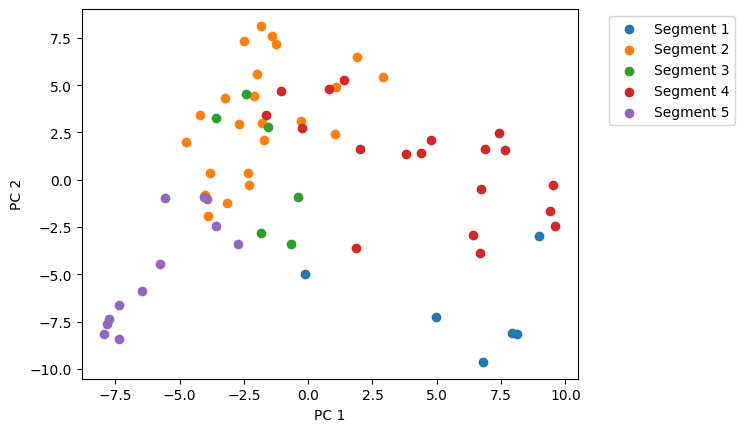

In [19]:
X = PCA(n_components=2).fit_transform(df_embeddings)

# plot components for each segment
for label in range(num_segments):
    indexes = np.where(clustering.labels_ == label)[0]
    plt.scatter(X[indexes,0], X[indexes,1], label=f"Segment {label+1}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()